Implementing Loss Functions

In [3]:
import matplotlib.pyplot as plt
import tensorflow as tf

In [4]:
x_vals = tf.linspace(-1., 1., 500)
target = tf.constant(0.)

1. The L2 norm loss is also known as the Euclidean loss function. It is just the square
of the distance to the target. Here we will compute the loss function as if the target
is zero. The L2 norm is a great loss function because it is very curved near the
target and algorithms can use this fact to converge to the target more slowly, the
closer it gets., as follows:


In [7]:
sess = tf.Session()
l2_y_vals = tf.square(target - x_vals)
l2_y_out = sess.run(l2_y_vals)

2. The L1 norm loss is also known as the absolute loss function. Instead of squaring
the difference, we take the absolute value. The L1 norm is better for outliers than
the L2 norm because it is not as steep for larger values. One issue to be aware of
is that the L1 norm is not smooth at the target and this can result in algorithms not
converging well. It appears as follows:

In [8]:
l1_y_vals = tf.abs(target - x_vals)
l1_y_out = sess.run(l1_y_vals)

3. Pseudo-Huber loss is a continuous and smooth approximation to the Huber loss
function. This loss function attempts to take the best of the L1 and L2 norms by
being convex near the target and less steep for extreme values. The form depends on
an extra parameter, delta, which dictates how steep it will be. We will plot two forms,
delta1 = 0.25 and delta2 = 5 to show the difference, as follows:

In [10]:
delta1 = tf.constant(0.25)
phuber1_y_vals = tf.multiply(tf.square(delta1), tf.sqrt(1. + tf.square((target - x_vals)/delta1)) - 1.)
phuber1_y_out = sess.run(phuber1_y_vals)

delta2 = tf.constant(5.)
phuber2_y_vals = tf.multiply(tf.square(delta2), tf.sqrt(1. + tf.square((target - x_vals)/delta2)) - 1.)
phuber2_y_out = sess.run(phuber2_y_vals)

Two very commonly used loss functions are the squared loss, L(a) = a^2, and the absolute loss, L(a)=|a|. The squared loss function results in an arithmetic mean-unbiased estimator, and the absolute-value loss function results in a median-unbiased estimator (in the one-dimensional case, and a geometric median-unbiased estimator for the multi-dimensional case). The squared loss has the disadvantage that it has the tendency to be dominated by outliers—when summing over a set of a's (as in ∑ i,n = L ( a_i ) , the sample mean is influenced too much by a few particularly large a-values when the distribution is heavy tailed: in terms of estimation theory, the asymptotic relative efficiency of the mean is poor for heavy-tailed distributions.
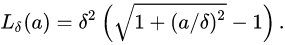

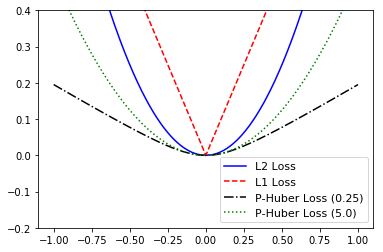

In [12]:
x_array = sess.run(x_vals)
plt.plot(x_array, l2_y_out, 'b-', label='L2 Loss')
plt.plot(x_array, l1_y_out, 'r--', label='L1 Loss')
plt.plot(x_array, phuber1_y_out, 'k-.',label='P-Huber Loss (0.25)')
plt.plot(x_array, phuber2_y_out, 'g:', label='P-Huber Loss (5.0)')
plt.ylim(-0.2, 0.4)
plt.legend(loc='lower right', prop={'size': 11})
plt.show()

Classification loss functions are used to evaluate loss when predicting categorical
outcomes.

In [13]:
x_vals = tf.linspace(-3., 5., 500)
target = tf.constant(1.)
targets = tf.fill([500,], 1.)

-> Hinge loss is mostly used for support vector machines, but can be used in neural
networks as well. It is meant to compute a loss between with two target classes, 1
and -1 . In the following code, we are using the target value 1 , so the as closer our
predictions as near are to 1 , the lower the loss value:

The hinge loss is a convex function, so many of the usual convex optimizers used in machine learning can work with it. It is not differentiable,

In [15]:
hinge_y_vals = tf.maximum(0., 1. - tf.multiply(target, x_vals))
hinge_y_out = sess.run(hinge_y_vals)

-> Cross-entropy loss for a binary case is also sometimes referred to as the logistic loss
function. It comes about when we are predicting the two classes 0 or 1 . We wish to
measure a distance from the actual class ( 0 or 1 ) to the predicted value, which is
usually a real number between 0 and 1 . To measure this distance, we can use the
cross entropy formula from information theory, as follows:
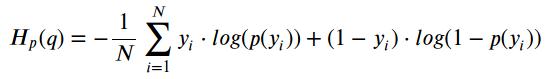

In [16]:
xentropy_y_vals = - tf.multiply(target, tf.log(x_vals)) - tf.multiply((1. -
target), tf.log(1. - x_vals))
xentropy_y_out = sess.run(xentropy_y_vals)

Sigmoid cross entropy loss is very similar to the previous loss function
except we transform the x-values by the sigmoid function before we put them in
the cross entropy loss, as follows:

In [19]:
xentropy_sigmoid_y_vals = tf.nn.sigmoid_cross_entropy_with_logits(logits=x_vals, labels = targets)
xentropy_sigmoid_y_out = sess.run(xentropy_sigmoid_y_vals)

Weighted cross entropy loss is a weighted version of the sigmoid cross entropy
loss . We provide a weight on the positive target. For an example, we will weight the
positive target by 0.5, as follows:

In [24]:
weight = tf.constant(0.5)
xentropy_weighted_y_vals = tf.nn.weighted_cross_entropy_with_logits(x_vals, targets, weight)
xentropy_weighted_y_out = sess.run(xentropy_weighted_y_vals)

Softmax cross-entropy loss operates on non-normalized outputs. This function
is used to measure a loss when there is only one target category instead of multiple.
Because of this, the function transforms the outputs into a probability distribution via
the softmax function and then computes the loss function from a true probability
distribution, as follows:

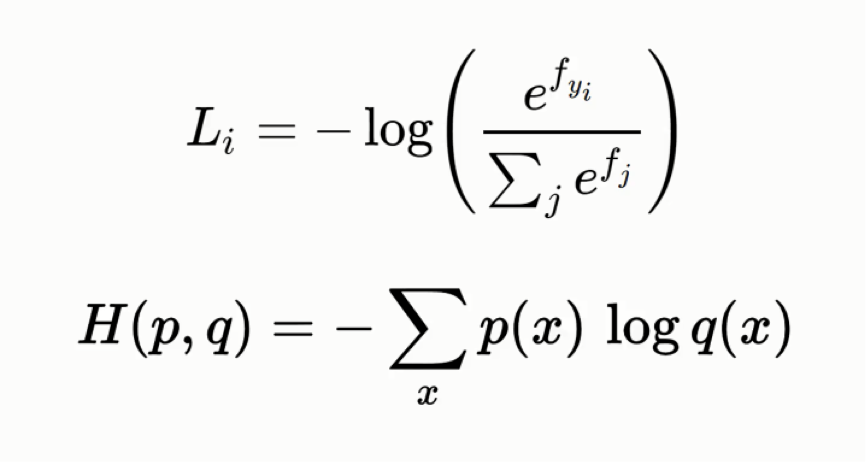

In [26]:
unscaled_logits = tf.constant([[1., -3., 10.]])
target_dist = tf.constant([[0.1, 0.02, 0.88]])
softmax_xentropy = tf.nn.softmax_cross_entropy_with_logits(logits=unscaled_logits, labels=target_dist)
print(sess.run(softmax_xentropy))

[1.1601256]


Sparse softmax cross-entropy loss is the same as previously, except instead
of the target being a probability distribution, it is an index of which category is true.
Instead of a sparse all-zero target vector with one value of one, we just pass in the
index of which category is the true value, as follows:

In [30]:
unscaled_logits = tf.constant([[1., -3., 10.]])
sparse_target_dist = tf.constant([2])
sparse_xentropy = tf.nn.sparse_softmax_cross_entropy_with_logits(logits=unscaled_logits, labels=sparse_target_dist)
print(sess.run(sparse_xentropy))

[0.00012564]


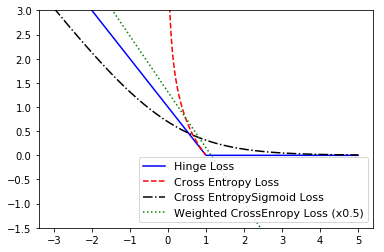

In [31]:
x_array = sess.run(x_vals)
plt.plot(x_array, hinge_y_out, 'b-', label='Hinge Loss')
plt.plot(x_array, xentropy_y_out, 'r--', label='Cross Entropy Loss')
plt.plot(x_array, xentropy_sigmoid_y_out, 'k-.', label='Cross EntropySigmoid Loss')
plt.plot(x_array, xentropy_weighted_y_out, 'g:', label='Weighted CrossEnropy Loss (x0.5)')
plt.ylim(-1.5, 3)
plt.legend(loc='lower right', prop={'size': 11})
plt.show()

<h2 style='padding: 10px'></h2><table class='table table-striped'> <thead> <tr> <th>Loss function</th> <th> Use </th> <th>Benifits</th> <th>Disadvantages</th> </tr> </thead> <tbody> <tr> <th scope='row'>L2</th> <td>Regression</td> <td>More stable</td> <td>Less robust</td> </tr> <tr> <th scope='row'>L1</th> <td>Regression</td> <td>More robust</td> <td>Less stable</td> </tr> <tr> <th scope='row'>Psuedo-Huber</th> <td>Regression</td> <td>More robust and stable</td> <td>one more paramter</td> </tr> <tr> <th scope='row'>Hinge</th> <td>Classification</td> <td>Creates a max margin for use in SVM</td> <td>Unbounded loss affected by outliers</td> </tr> <tr><th scope='row'>Cross entropy</th> <td>Classification</td> <td>More stable</td> <td>Unbounded loss, less robust</td> </tr> </tbody> </table>